In [1]:
# # Install packages not present in default Colab environment
# !pip install numpyro posteriordb

In [2]:
# # Get the PosteriorDB
# !git clone https://github.com/stan-dev/posteriordb.git

# 1. PosteriorDB

See https://arxiv.org/abs/2407.04967v1

In [1]:
from posteriordb import PosteriorDatabase
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pdb_path = "../../posteriordb/posterior_database"
my_pdb = PosteriorDatabase(pdb_path)

In [3]:
posterior = my_pdb.posterior("kidiq-kidscore_momhsiq")

p_model = posterior.model
p_data = posterior.data

## 1.1. Accessing the data

In [4]:
p_data.information

{'name': 'kidiq',
 'keywords': ['ARM', 'Ch. 3', 'stan_examples'],
 'title': 'Cognitive test scores of three- and four-year-old children',
 'description': '  - N         : number of observations\n  - kid_score : cognitive test scores of three- and four-year-old children\n  - mom_hs    : did mother complete high school? 1: Yes, 0: No\n  - mom_iq    : mother IQ score\n  - mom_hs_new: new data for prediction\n  - mom_iq_new: new data for prediction',
 'urls': 'https://github.com/stan-dev/example-models/tree/master/ARM/Ch.3',
 'references': 'gelman2006data',
 'added_date': '2020-01-10',
 'added_by': 'Mans Magnusson'}

In [5]:
print(p_data.information["description"])

  - N         : number of observations
  - kid_score : cognitive test scores of three- and four-year-old children
  - mom_hs    : did mother complete high school? 1: Yes, 0: No
  - mom_iq    : mother IQ score
  - mom_hs_new: new data for prediction
  - mom_iq_new: new data for prediction


In [6]:
values_dict = p_data.values()
for key, vals in values_dict.items():
    print(f"{key}: {type(vals)}")

N: <class 'int'>
kid_score: <class 'list'>
mom_hs: <class 'list'>
mom_iq: <class 'list'>
mom_hs_new: <class 'int'>
mom_iq_new: <class 'int'>


In [7]:
data_df = pd.DataFrame(values_dict, columns=['kid_score', 'mom_hs', 'mom_iq'])
data_df

,kid_score,mom_hs,mom_iq
0,65,1,121.117529
1,98,1,89.361882
2,85,1,115.443165
3,83,1,99.449639
4,115,1,92.745710
...,...,...,...
429,94,0,84.877412
430,76,1,92.990392
431,50,0,94.859708
432,88,1,96.856624


In [8]:
data_df.describe()

,kid_score,mom_hs,mom_iq
count,434.000000,434.000000,434.000000
mean,86.797235,0.785714,100.000000
std,20.410688,0.410799,15.000000
min,20.000000,0.000000,71.037405
25%,74.000000,1.000000,88.660321
50%,90.000000,1.000000,97.915254
75%,102.000000,1.000000,110.272742
max,144.000000,1.000000,138.893106


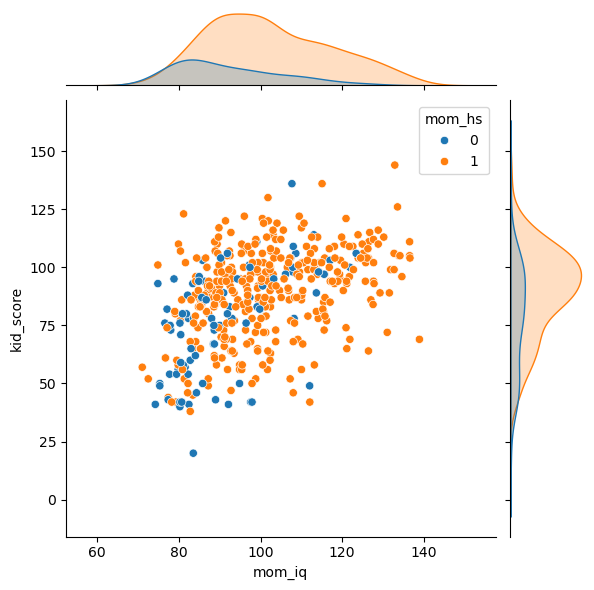

In [9]:
sns.jointplot(data_df, x="mom_iq", y="kid_score", hue="mom_hs")

## 1.2. Accessing the model

In [10]:
p_model.information

{'name': 'kidscore_momhsiq',
 'keywords': ['ARM', 'Ch. 3', 'stan_examples'],
 'title': 'Multiple Predictors Linear Model',
 'prior': {'keywords': 'stan_recommended_35dbfe6'},
 'description': 'kid_score ~ mom_hs + mom_iq',
 'urls': 'https://raw.githubusercontent.com/stan-dev/example-models/master/ARM/Ch.3/kidiq_multi_preds.stan',
 'references': 'gelman2006data',
 'added_date': '2020-01-13',
 'added_by': 'Oliver Järnefelt'}

In [11]:
print(p_model.stan_code())

data {
  int<lower=0> N;
  vector<lower=0, upper=200>[N] kid_score;
  vector<lower=0, upper=200>[N] mom_iq;
  vector<lower=0, upper=1>[N] mom_hs;
}
parameters {
  vector[3] beta;
  real<lower=0> sigma;
}
model {
  sigma ~ cauchy(0, 2.5);
  kid_score ~ normal(beta[1] + beta[2] * mom_hs + beta[3] * mom_iq, sigma);
}





## 1.3. Accessing the posterior

In [12]:
posterior.information

{'keywords': ['arm book', 'stan examples'],
 'urls': 'https://github.com/stan-dev/example-models/tree/master/ARM/Ch.3',
 'references': 'gelman2006data',
 'dimensions': {'beta': 3, 'sigma': 1},
 'added_date': '2020-01-13',
 'added_by': 'Oliver Järnefelt'}

In [13]:
posterior.name

'kidiq-kidscore_momhsiq'

In [14]:
posterior.reference_draws_info()['inference']

{'method': 'stan_sampling',
 'method_arguments': {'chains': 10,
  'iter': 20000,
  'warmup': 10000,
  'thin': 10,
  'seed': 4711,
  'control': {'adapt_delta': 0.8}}}

In [15]:
posterior.reference_draws_info()["diagnostics"]

{'diagnostic_information': {'names': ['beta[1]',
   'beta[2]',
   'beta[3]',
   'sigma']},
 'ndraws': 10000,
 'nchains': 10,
 'effective_sample_size_bulk': [10261.1339699153,
  10231.4957351984,
  10250.2853386041,
  10062.1856671618],
 'effective_sample_size_tail': [10079.2391372892,
  9953.80983922285,
  10074.5986042733,
  9914.740345211],
 'r_hat': [0.999869000404669,
  1.00011735563098,
  0.999836416246855,
  1.00053606689533],
 'divergent_transitions': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'expected_fraction_of_missing_information': [1.96606679499034,
  2.06176484692665,
  2.05598322842441,
  1.90234956255607,
  2.03136969985891,
  2.00916989171201,
  2.06417949120362,
  1.99690889413627,
  2.0089226830519,
  1.96529260910074]}

Convergence diagnostic $\hat{R}$ is used: https://doi.org/10.1214/20-BA1221

In [16]:
reference_draws = posterior.reference_draws()
len(reference_draws)

10

Data structure:

[

    {                     - chain1
        param1: [...],
        param2: [...],
        ...
    },
    
    {...},                - chain2,

    ...
    
    {...}                 - chain10
]

In [17]:
reference_draws[0].keys()

dict_keys(['beta[1]', 'beta[2]', 'beta[3]', 'sigma'])

In [18]:
# Combine all chain draws into a single DataFrame and add chain identifier
reference_draws_df = pd.concat([
    pd.DataFrame(chain_draw).assign(chain_id=i)
    for i, chain_draw in enumerate(reference_draws)
])

# reference_draws_df["step"] = reference_draws_df.index

# Rename beta columns to adjust the indices for later usage
reference_draws_df.rename(columns={f"beta[{i+1}]": f"beta[{i}]" for i in range(3)}, inplace=True)

reference_draws_df

,beta[0],beta[1],beta[2],sigma,chain_id
0,43.315341,8.028461,0.374428,18.292501,0
1,23.388870,8.122381,0.551708,18.008244,0
2,23.518381,6.336248,0.592277,17.495827,0
3,26.799274,0.563804,0.599978,18.646986,0
4,26.779357,4.544044,0.556359,18.209594,0
...,...,...,...,...,...
995,26.776659,7.201880,0.534026,17.539622,9
996,25.078451,9.037136,0.543398,18.289046,9
997,27.018337,6.410937,0.546191,17.484793,9
998,21.825134,8.081853,0.582130,18.692422,9


In [19]:
reference_draws_df.describe()

,beta[0],beta[1],beta[2],sigma,chain_id
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25.794115,5.987432,0.562994,18.139194,4.500000
std,5.860621,2.216019,0.060466,0.618526,2.872425
min,5.379161,-2.125778,0.338212,15.693816,0.000000
25%,21.910704,4.481625,0.522379,17.714820,2.000000
50%,25.826163,5.981016,0.562683,18.119150,4.500000
75%,29.692561,7.488505,0.603111,18.542002,7.000000
max,47.632699,13.754934,0.787924,20.710710,9.000000


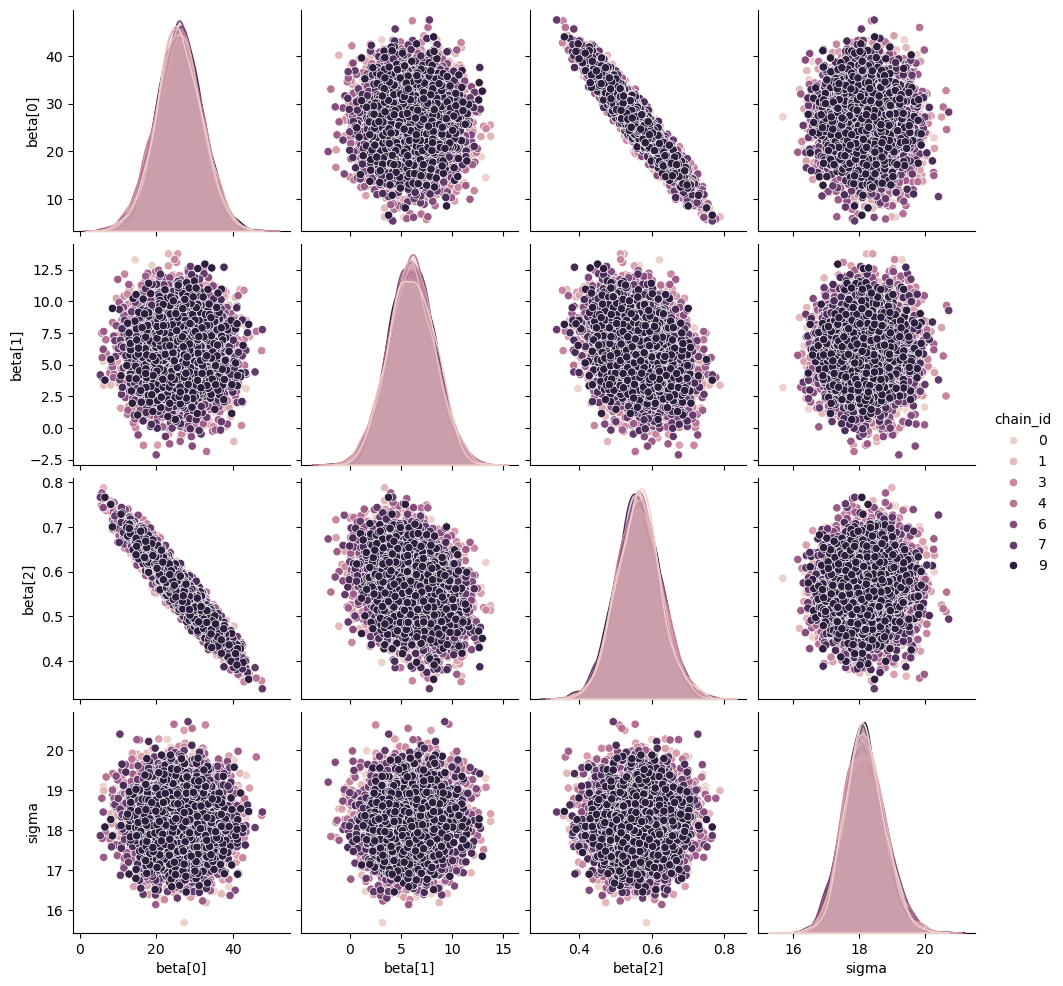

In [20]:
sns.pairplot(reference_draws_df, vars=["beta[0]", "beta[1]", "beta[2]", "sigma"], hue="chain_id")

In [21]:
# sns.scatterplot(reference_draws_df, x=reference_draws_df.index, y="sigma", marker='.')

In [22]:
reference_draws_df.drop(columns=["chain_id"], inplace=True)

# 2. NumPyro

See https://num.pyro.ai/en/latest/index.html

In [23]:
import numpyro
import numpyro.distributions as dist
import numpyro.infer as infer
from jax import random
import jax.numpy as jnp

In [24]:
mom_iq=jnp.array(data_df["mom_iq"])
mom_hs=jnp.array(data_df["mom_hs"])
kid_score=jnp.array(data_df["kid_score"])

## 2.1. Specifying the model

In [25]:
print(p_model.stan_code())

data {
  int<lower=0> N;
  vector<lower=0, upper=200>[N] kid_score;
  vector<lower=0, upper=200>[N] mom_iq;
  vector<lower=0, upper=1>[N] mom_hs;
}
parameters {
  vector[3] beta;
  real<lower=0> sigma;
}
model {
  sigma ~ cauchy(0, 2.5);
  kid_score ~ normal(beta[1] + beta[2] * mom_hs + beta[3] * mom_iq, sigma);
}





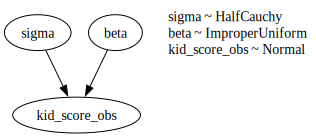

In [26]:
def model(mom_iq, mom_hs, kid_score=None):

    # Priors
    sigma = numpyro.sample("sigma", dist.HalfCauchy(2.5))
    beta = numpyro.sample("beta", dist.ImproperUniform(dist.constraints.real_vector, (), event_shape=(3,)))

    # Linear model
    ones = jnp.ones_like(mom_hs)
    X = jnp.stack([ones, mom_hs, mom_iq], axis=1)
    mu = jnp.matmul(X, beta)
    # mu = beta[0] + beta[1] * mom_hs + beta[2] * mom_iq

    # Observed variable
    numpyro.sample("kid_score_obs", dist.Normal(mu, sigma), obs=kid_score)

infer.inspect.render_model(model, model_args=(mom_iq, mom_hs), render_distributions=True)

## 2.2. Specifying the kernel

Or use Sample Adaptive MCMC kernel from https://proceedings.neurips.cc/paper_files/paper/2019/file/2cfa8f9e50e0f510ede9d12338a5f564-Paper.pdf

In [28]:
from ARWMH import ARWMH
kernel = ARWMH(model)
# kernel = infer.SA(model)

## 2.3 Running MCMC

In [48]:
mcmc = infer.MCMC(kernel, num_warmup=1000000, num_samples=1000000, thinning=100)
rng_key = random.PRNGKey(0)

mcmc.run(rng_key,
         mom_iq=mom_iq, mom_hs=mom_hs, kid_score=kid_score,
         extra_fields=("potential_energy", "mean_accept_prob")
        )


ample: 100%|█| 2000000/2000000 [03:08<00:00, 10629.76it/s, Acceptance rate: 0.48, Step size: 0.769]

In [37]:
posterior_samples = mcmc.get_samples()
extra_fields = mcmc.get_extra_fields()
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
   beta[0]     25.77      5.89     25.70     16.28     35.78   2213.23      1.00
   beta[1]      5.94      2.23      5.85      2.32      9.64   1766.22      1.00
   beta[2]      0.56      0.06      0.56      0.46      0.66   2172.65      1.00
     sigma      2.90      0.03      2.90      2.84      2.96   2369.05      1.00



/var/folders/lx/m574kzfj6c3b241z6bw_nkx80000gq/T/ipykernel_96259/963703928.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0, 0.5, 'Acceptance probability')

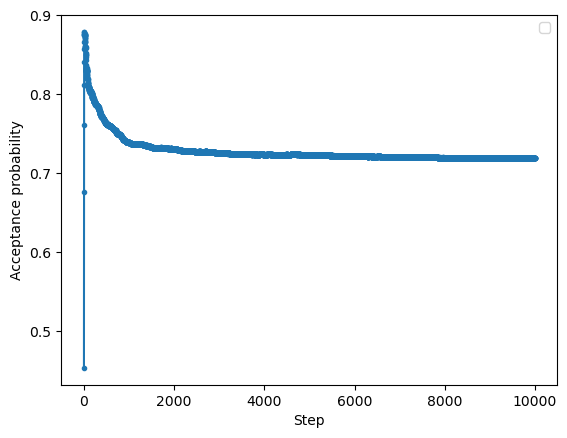

In [39]:
plt.plot(extra_fields["mean_accept_prob"], marker='.')
# plt.hlines(y=mean_accept_prob, xmin=0, xmax=len(extra_fields["accept_prob"]), colors="gray", linestyles="solid", label=f"Mean: {mean_accept_prob:.2f}")
plt.legend()
plt.xlabel("Step")
plt.ylabel("Acceptance probability")

In [143]:
# sigma_var = extra_fields["adapt_state"][1][:, 3, 3]
# sns.scatterplot(sigma_var, marker='.')
# plt.xlabel("Step")
# plt.ylabel("Estimated Variance for sigma")

In [40]:
posterior_samples_df = pd.DataFrame({
    "beta[0]": posterior_samples["beta"][:,0],
    "beta[1]": posterior_samples["beta"][:,1],
    "beta[2]": posterior_samples["beta"][:,2],
    "sigma": posterior_samples["sigma"]
})

# posterior_samples_df["step"] = posterior_samples_df.index

posterior_samples_df

,beta[0],beta[1],beta[2],sigma
0,15.394611,4.876261,0.674270,2.843635
1,20.333221,4.707417,0.627328,2.881605
2,22.909548,4.621680,0.598711,2.900970
3,22.558773,4.638688,0.604669,2.890583
4,24.659019,4.567928,0.582092,2.902077
...,...,...,...,...
9995,22.977894,3.515871,0.619596,2.958252
9996,22.755363,2.092628,0.637614,2.994745
9997,30.873510,1.585928,0.556547,2.979195
9998,21.002436,3.395448,0.637160,2.890080


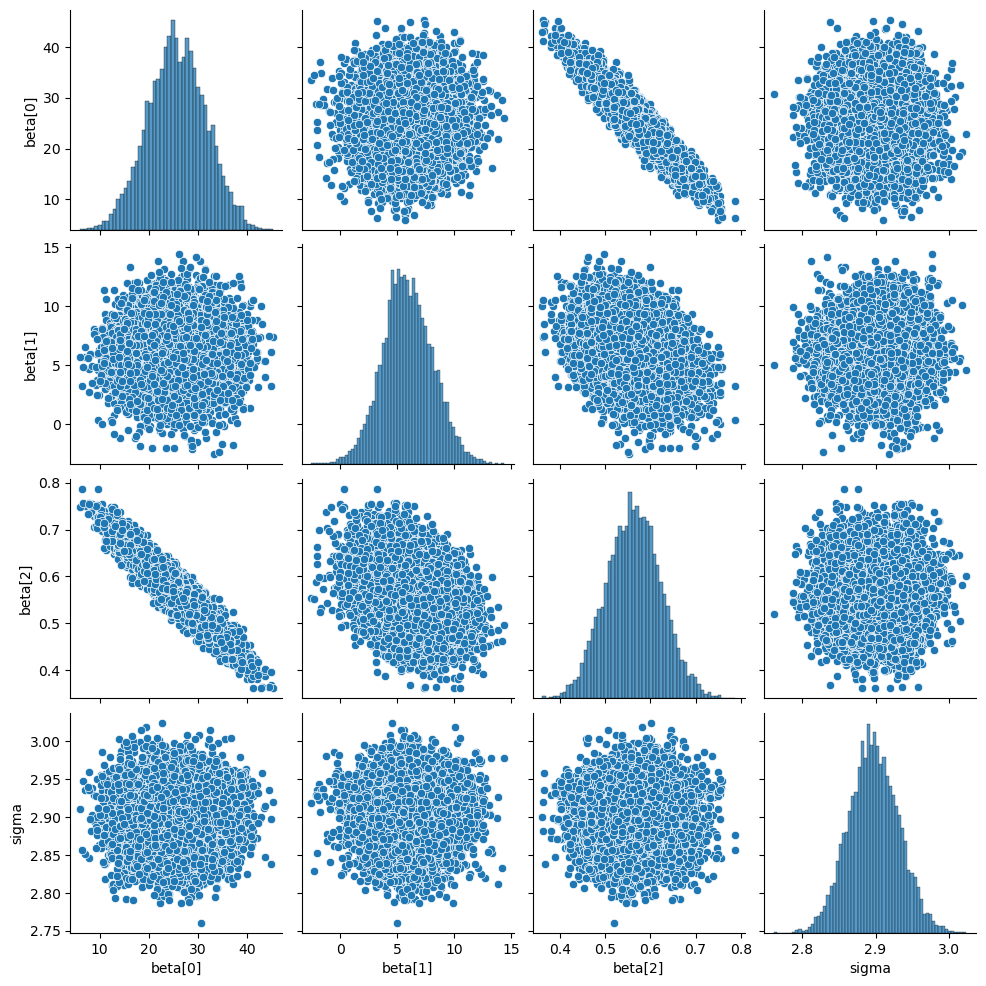

In [43]:
sns.pairplot(posterior_samples_df, vars=["beta[0]", "beta[1]", "beta[2]", "sigma"])

Text(0.5, 0, 'Step')

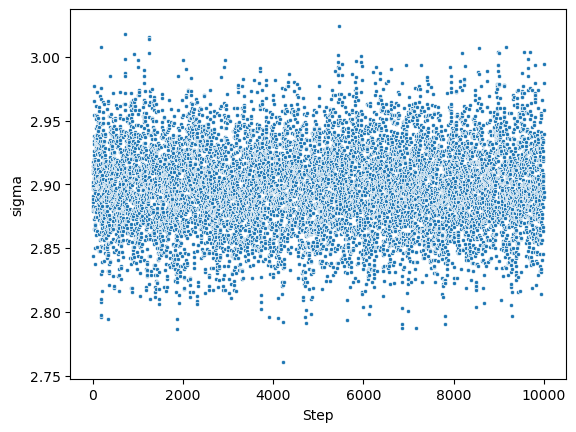

In [44]:
sns.scatterplot(posterior_samples_df, x=posterior_samples_df.index, y="sigma", marker='.')
plt.xlabel("Step")

In [45]:
predictive = infer.Predictive(model, posterior_samples=posterior_samples)
kid_score_pred = predictive(rng_key, mom_iq=mom_iq, mom_hs=mom_hs)["kid_score_obs"]

kid_score_pred_mean = kid_score_pred.mean(axis=0)
hdpi = numpyro.diagnostics.hpdi(kid_score_pred, prob=0.95)

In [46]:
idx = jnp.argsort(mom_iq)

idx_0 = idx[mom_hs[idx] == 0]
idx_1 = idx[mom_hs[idx] == 1]

Text(0.5, 0, 'mom_iq')

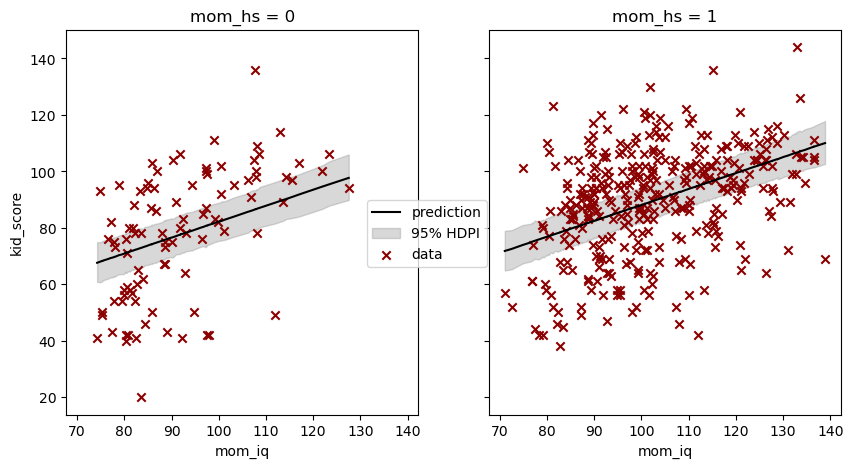

In [47]:
fig, (ax_0, ax_1) = plt.subplots(1, 2, figsize=(10,5), sharex=True, sharey=True)

ax_0.plot(mom_iq[idx_0], kid_score_pred_mean[idx_0], ls='-', color="black", label="prediction")
ax_0.fill_between(mom_iq[idx_0], hdpi[0, idx_0], hdpi[1, idx_0], alpha=0.3, color="gray", label="95% HDPI")
ax_0.scatter(mom_iq[idx_0], kid_score[idx_0], marker='x', color="darkred", label="data")
ax_0.set_xlabel("mom_iq")
ax_0.set_ylabel("kid_score")
ax_0.set_title("mom_hs = 0")

fig.legend(loc='center')

ax_1.plot(mom_iq[idx_1], kid_score_pred_mean[idx_1], ls='-', color="black", label="prediction")
ax_1.fill_between(mom_iq[idx_1], hdpi[0, idx_1], hdpi[1, idx_1], alpha=0.3, color="gray", label="95% HDPI")
ax_1.scatter(mom_iq[idx_1], kid_score[idx_1], marker='x', color="darkred", label="data")
ax_1.set_title("mom_hs = 1")
ax_1.set_xlabel("mom_iq")

# 3. Evaluation

In [150]:
combined_df = pd.concat([
    reference_draws_df.assign(source = "reference"),
    posterior_samples_df.assign(source = "samples"),
])

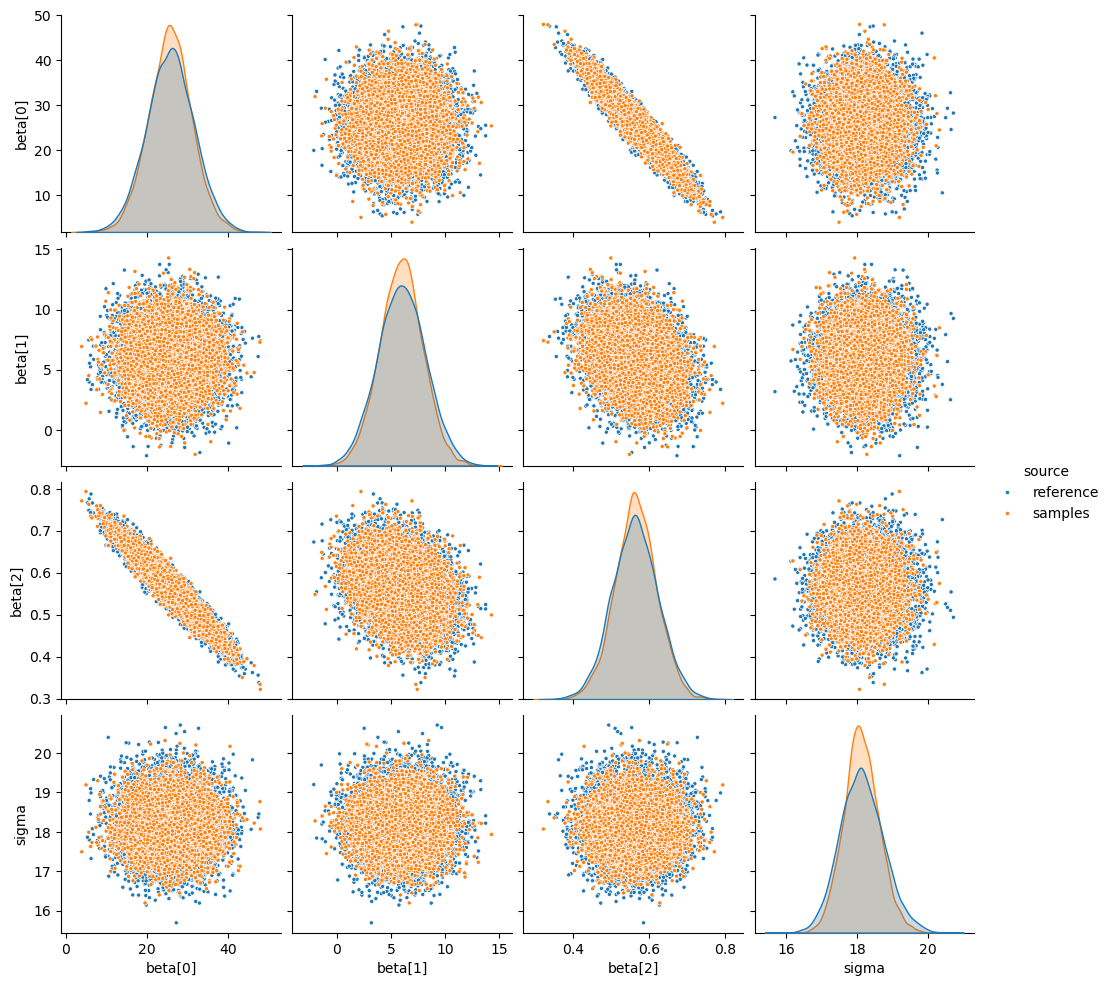

In [151]:
sns.pairplot(combined_df, hue="source", markers=".")

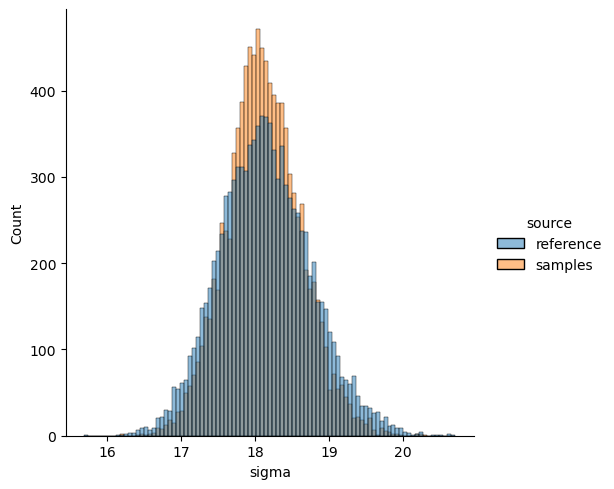

In [152]:
sns.displot(combined_df, x="sigma", hue="source")

There appears to be an error in evaluation of sigma when using RW Metropolis

## 3.1. Moments

In [159]:
p = 2

pth_moments = combined_df.groupby("source").aggregate(lambda vals: np.mean(vals**p)).transpose().rename_axis(f"E[|X|^{p}]")
pth_moments["% diff"] = np.abs(pth_moments["reference"] - pth_moments["samples"])/(pth_moments["reference"])*100

pth_moments

source,reference,samples,% diff
E[|X|^2],,,
beta[0],699.679786,690.032005,1.378885
beta[1],40.759592,39.124551,4.011425
beta[2],0.320618,0.321808,0.371328
sigma,329.412899,328.696745,0.217403


## 3.2. Wasserstein-1 Distance

$$ \mathcal{W}(u, v) = \inf_{\xi \in \mathcal{C} (u, v)} \int \| x-y \|_2 \xi (dx,dy) $$


In [160]:
from scipy.stats import wasserstein_distance_nd
from jax import vmap, jit

from ott.geometry import pointcloud, costs
from ott.solvers import linear

In [ ]:
# Computing optimal 1-1 coupling

def wasserstein_disc11_p(u_values, v_values, p=2):

    cost_matrix = distance_matrix(u_values, v_values, p=p)
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    opt_cost = cost_matrix[row_ind, col_ind].mean().item()
    return opt_cost
    

def wasserstein_disc11_d(u_values, v_values, dist_fn):

    dist_vmap = vmap(lambda x: vmap(lambda y: dist_fn(x, y))(v_values), in_axes=(0,))

    cost_matrix = dist_vmap(u_values)
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    opt_cost = cost_matrix[row_ind, col_ind].mean().item()
    return opt_cost

In [161]:
def wasserstein_distance_ot(u_values, v_values):
    geom = pointcloud.PointCloud(x=u_values, y=v_values, cost_fn=costs.Euclidean())
    solve_fn = jit(linear.solve)
    ot = solve_fn(geom)
    return ot.primal_cost.item()

In [198]:
n = 1000
x=jnp.array(posterior_samples_df)[:n]
y=jnp.array(reference_draws_df)[:n]

In [199]:
geom = pointcloud.PointCloud(x=x, y=y, cost_fn=costs.Euclidean())
solve_fn = jit(linear.solve)
ot = solve_fn(geom)

print(
    " Sinkhorn has converged: ",
    ot.converged,
    "\n",
    "Error upon last iteration: ",
    ot.errors[(ot.errors > -1)][-1],
    "\n",
    "Sinkhorn required ",
    jnp.sum(ot.errors > -1),
    " iterations to converge. \n",
    "Entropy regularized OT cost: ",
    ot.ent_reg_cost,
    "\n",
    "OT cost (without entropy): ",
    jnp.sum(ot.matrix * ot.geom.cost_matrix),
)

 Sinkhorn has converged:  True 
 Error upon last iteration:  0.0009400726 
 Sinkhorn required  34  iterations to converge. 
 Entropy regularized OT cost:  -1.0818982 
 OT cost (without entropy):  1.2382817


In [200]:
%%time

wasserstein_distance_ot(x, y)

CPU times: user 2.22 s, sys: 51.3 ms, total: 2.27 s
Wall time: 1.12 s


1.2382817268371582

In [208]:
def wasserstein_1d(mu, nu, p=2.0):
    """
    Compute the 1D Wasserstein distance between two arrays.
    
    Parameters:
    - mu, nu: 1D arrays.
    
    Returns:
    - float: The Wasserstein distance in 1D.
    """

    # Compute the absolute differences
    diff = jnp.abs(jnp.sort(mu) - jnp.sort(nu))
    
    # Raise to the power of p
    diff_p = diff ** p
    
    # Compute the p-th root of the sum of differences to the power p
    return jnp.power(jnp.mean(diff_p), 1.0 / p)


def max_sliced_wasserstein(mu, nu, rng_key, p=2.0, n_directions=1000):
    """
    Approximate the Wasserstein distance using the max-sliced approach with JAX.

    Parameters:
    - mu, nu: jnp.arrays of shape (n_samples, n_dimensions) representing 
              points sampled from two distributions.
    - key: JAX PRNG key for randomness.
    - n_directions: Number of random directions to project onto.

    Returns:
    - float: An approximation of the Wasserstein distance.
    """
    n_dim = mu.shape[1]
    
    # Generate random directions on the unit sphere
    directions = random.normal(rng_key, (n_directions, n_dim))
    directions = directions / jnp.linalg.norm(directions, axis=1, keepdims=True)
    
    # Vectorizing projection and 1D Wasserstein computation over directions
    project_and_compute = vmap(lambda dir: wasserstein_1d(
        jnp.dot(mu, dir),
        jnp.dot(nu, dir),
        p=p
    ))
    
    distances = project_and_compute(directions)
    
    return jnp.max(distances)

In [210]:
%%time

rng_key, key_wasserstein = random.split(rng_key, 2)
max_sliced_wasserstein(x, y, key_wasserstein, n_directions=10000).item()

CPU times: user 4.06 s, sys: 69.5 ms, total: 4.13 s
Wall time: 4.04 s


0.821402907371521

In [64]:
%%time

wasserstein_distance_nd(x, y)

CPU times: user 2min 21s, sys: 1.93 s, total: 2min 23s
Wall time: 2min 23s


1.014705041037865

In [205]:
%%time

wasserstein_distance_nd(x, y)

CPU times: user 2min 21s, sys: 2.45 s, total: 2min 24s
Wall time: 2min 24s


1.014705041037865

## 3.3. Maximum Mean Discrepancy

Given a symmetric, positive-definite kernel kernel $k(\cdot,\cdot): \mathcal{X} \times \mathcal{X} \to \mathbb{R}$,
the MMD between distributions $P$ and $Q$ is given by

$$ MMD(P, Q)^2 = \int_{\mathcal{X} \times \mathcal{X}} k(x, x') P(dx)P(dx') + \int_{\mathcal{X} \times \mathcal{X}} k(y, y') Q(dy)Q(dy') - 2\int_{\mathcal{X} \times \mathcal{X}} k(x, y) P(dx)Q(dy) $$

Usually Gaussian kernel is used with

$$ k(x,y) := \exp \left( -\frac{\| x-y \|^2}{ \ell^2 } \right) $$.


In [49]:
from sklearn.metrics.pairwise import rbf_kernel

def mmd(p, q, l=1.0):
    P = rbf_kernel(p, gamma=1/l**2)
    Q = rbf_kernel(q, gamma=1/l**2)
    PQ = rbf_kernel(p, q, gamma=1/l**2)
    mmd = np.sqrt(np.mean(P) + np.mean(Q) - 2*np.mean(PQ))
    return mmd

In [50]:
%%time
mmd(posterior_samples_df.values, reference_draws_df.values).item()

CPU times: user 2.51 s, sys: 1 s, total: 3.51 s
Wall time: 2.32 s


0.030942834407007132

## 3.4. Pareto-$\hat{k}$ diagnostic

See https://arxiv.org/abs/1507.02646